In [1]:
!pip install pyshp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import seaborn as sb
from urllib.request import urlopen
from bs4 import BeautifulSoup as bsoup
from matplotlib.pyplot import figure
%matplotlib inline

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Goal of analysis:

We are aiming to get an overview of AirBnb listings in New York City 2019, with the aim of providing improvement suggestions and stragies for AirBnb going forward. It is key that when making suggestions we look at issues at all angles.

#### Notes before we start
- Pricing is in US Dollars
- Price is per night


In [2]:
# Read in data, 
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Show all features
data.columns.values


array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [4]:
# number of unique hosts
print("Number of unique hosts:", len(data["host_id"].unique()))

# Number of listings total
print("Number of listings total:", len(data))

# Number of features
print("Number of features:", len(data.columns.values))


Number of unique hosts: 37457
Number of listings total: 48895
Number of features: 16


['Private room' 'Entire home/apt' 'Shared room']


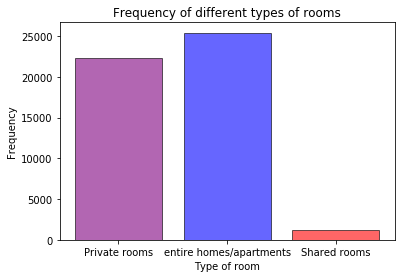

In [5]:
# Plot distribution of listing prices by the type of room it is

# Get unique types of rooms 
print(data["room_type"].unique())

x1 = data.loc[data.room_type=="Private room", "price"]
x2 = data.loc[data.room_type=="Entire home/apt", "price"]
x3 = data.loc[data.room_type=="Shared room", "price"]

# Bar plot of the frequency counts
plt.bar(x=["Private rooms", "entire homes/apartments", "Shared rooms"], height=[len(x1), len(x2), len(x3)], color=["purple", "blue", "red"] , edgecolor="black", alpha=0.6)
plt.title("Frequency of different types of rooms")
plt.xlabel("Type of room")
plt.ylabel("Frequency")
plt.show()


### 1. Let's identify some neighoburhood group patterns


['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


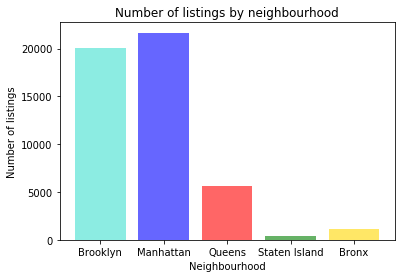

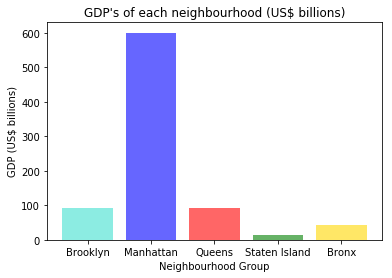

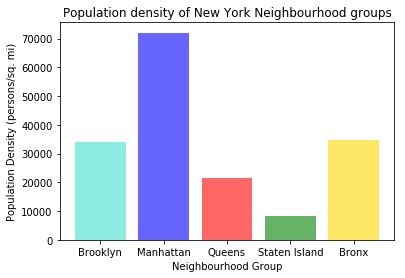

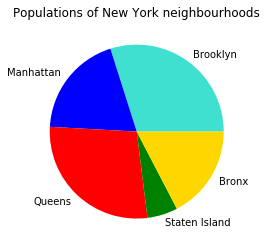

In [6]:
# Lets see with neighoburhood group now
unique_neighbourhoods = list(data["neighbourhood_group"].unique())
print(unique_neighbourhoods)

# assign colors for plotting
dict_col = {"Brooklyn": "turquoise", "Queens": "red", "Staten Island": "green", "Bronx": "gold", "Manhattan": "blue"}
col_list = [dict_col[neighbourhood] for neighbourhood in data["neighbourhood_group"]]
color_list = ["turquoise", "blue", "red", "green", "gold"]

list_ng = list(data["neighbourhood_group"])

list_counts = [list_ng.count("Brooklyn"), list_ng.count("Manhattan"), list_ng.count("Queens"), list_ng.count("Staten Island"),
    list_ng.count("Bronx")]

# Plot frequency counts
plt.bar(x=unique_neighbourhoods, height=list_counts, color=color_list, alpha=0.6)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")
plt.title("Number of listings by neighbourhood")
plt.show()


# PLot showing gdp's of each burough 
gdps = [91.559, 600.244, 93.310, 14.514, 42.695]
plt.bar(x=unique_neighbourhoods, height=gdps, color=color_list, alpha=0.6)
plt.title("GDP's of each neighbourhood (US$ billions)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("GDP (US$ billions)")
plt.show()

# Plot showing population density (persons / squaremile)
pkmsq = [34137, 72033, 21460, 8112, 34653]
plt.bar(x=unique_neighbourhoods, height=pkmsq, color=color_list, alpha=0.6)
plt.title("Population density of New York Neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Population Density (persons/sq. mi)")
plt.show()

# Pie chart showing populations (gathered 10/12/2019)
populations = [2533000, 1629000, 2359000, 479458, 1471000]
plt.pie(populations, labels=unique_neighbourhoods, colors=color_list)
plt.title("Populations of New York neighbourhoods")
plt.show()


### 1. Summary of plots and Business Strategy

One thing in particular is noticeable from the first figure(top): it is that the Number of listings for Manhattan and Brooklyn are far higher than those of Bronx and Queens (and of course Staten Island). 

Remember GDP is a measure of how the total value of final goods and services produced within a countries (or neighbourhood in our case) borders. We can use this as a measure of the "general wealth" of the area. We see that Manhattan is FAR superior in terms of their GDP, with Brooklyn far behind in second. Interestingly the GDP of Brooklyn and Queens are very similar whilst the number of listings differ quite a bit. We can link this to population density being 1.5x more in Brooklyn, so if GDP is the same, more people = more listings. We also see that the population density of The Bronx is higher than that of Brooklyn but GDP of 2x that of The Bronx, even though populations are very similar. 

We can conclude that having a high population density in combination to a low GDP can lead to a low number of AirBnb listings. Why is this? Well, it is fair to say that tourists are the main market for airbnb hosts, and tourists generally would settle for "nicer" looking place, and nicer looking places tend to be in higher GDP areas. The question would be for The Bronx, and Queens is: would it be worth setting up an AirBnb?   

What we can take away from this, is that AirBnb should come up with a strategy that targets Queens, as it is a highly populated area, is close to Manhattan and has a decent GDP indicating the wealth of the area (and potential). The Bronx is known to have a high poverty rate (28%) so targeting this area may not be worth the costs.  


### 2. Let's look at some Pricing Patterns

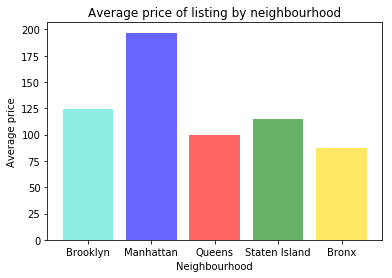

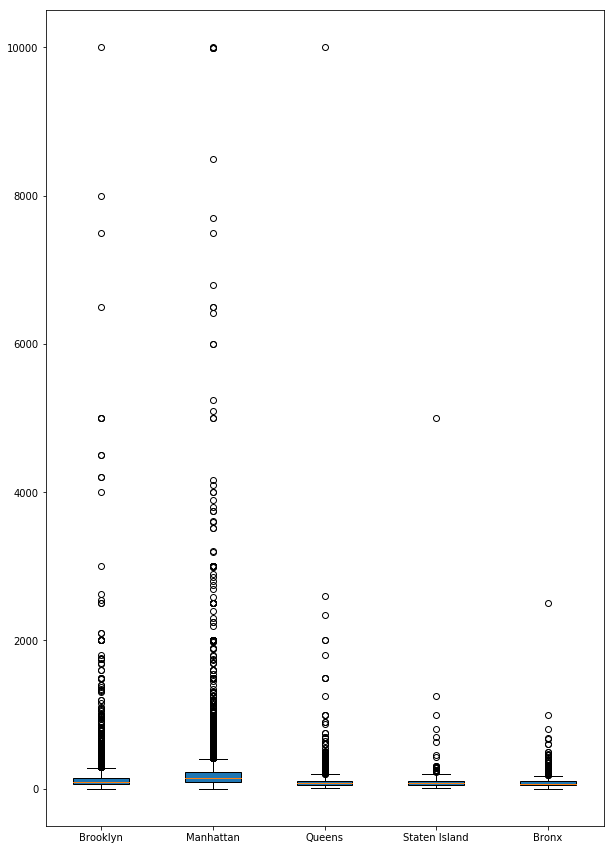

In [7]:
# Average price of prices
def get_price_neighbourhood(dataF, neighbourhood):
    list_price_neighbourhood = [dataF["price"][i] for i in range(len(dataF)) if dataF["neighbourhood_group"][i] == neighbourhood]
    return list_price_neighbourhood
    
    
brooklyn_list = get_price_neighbourhood(data, "Brooklyn")
manhattan_list = get_price_neighbourhood(data, "Manhattan")
queens_list = get_price_neighbourhood(data, "Queens")
staten_island_list = get_price_neighbourhood(data, "Staten Island")
bronx_prices_list = get_price_neighbourhood(data, "Bronx")

averages_list = [np.average(brooklyn_list), np.average(manhattan_list), np.average(queens_list), np.average(staten_island_list), np.average(bronx_prices_list)]

plt.bar(x=unique_neighbourhoods, height=averages_list, color=color_list, alpha=0.6)
plt.title("Average price of listing by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Average price")
plt.show()

# boxplots showing price distributions
figure(figsize=(10,15))
plt.boxplot(x=[brooklyn_list, manhattan_list, queens_list, staten_island_list, bronx_prices_list], patch_artist=True, labels=unique_neighbourhoods)
plt.show()


#### Wait....
Hmmm,not very visually pleasing. Boxplots split the data into Quartiles and Flier points. The flier points are represented by the dots on the graph above. This plot is not easily interpretable as the range of the dataset is so large (10,000 to 0).

But before we do this let's look at the flier points. The outliers give us some insight into where the upper-class listings lie. Unsurprisingly, we see Manhattan has a higher Upper Quartile Limit, and more flier points than any other. Brooklyn seems to have less flier points than Manhattan and those points are less densely populated. We also see that Queens and Bronx have no listings over 3000 and Staten Island has one over 4000 but no other listings over 1000.

Let's process some of this data out. Note that there are listings with 0$ price. Let's remove these listings, as we shall label them as human errors (i don't believe anyone is offering any free place to stay...). We should be able to see the bulk of the data after getting rid of the flier points momentarily. 

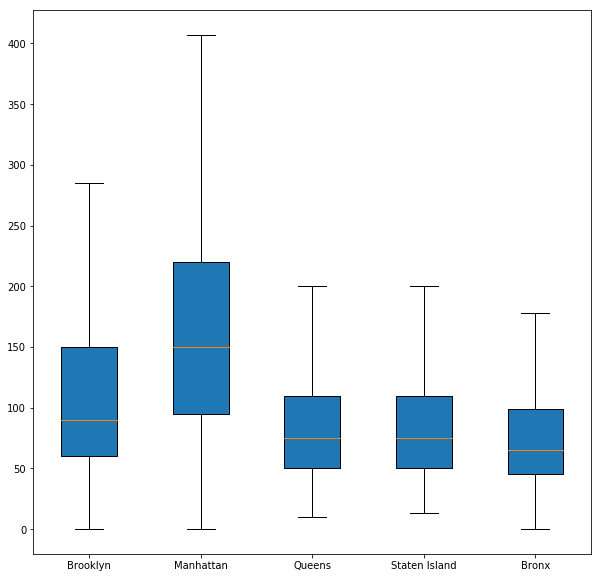

In [10]:
# Let's drop all with price == 0
data = data.drop(data[data.price == 0].index)

# boxplots showing price distributions
figure(figsize=(10,10))
plt.boxplot(x=[brooklyn_list, manhattan_list, queens_list, staten_island_list, bronx_prices_list], patch_artist=True, labels=unique_neighbourhoods, showfliers=False)
plt.show()


#### Interpretation
Now the graph is a bit easier to interpret. 
Just a review of how to interpret Boxplots, each "section" represents 25% of the data (not including outlier points). So: 
- The bottom whisker represents the bottom 25% which is from the MIN value to the Lower Quartile (LQ - Bottom of the Box). 
- The box represents the middle 50% of the data (Inter-Quartile Range), you should look at the Box as the Bulk of the data, the median is shown by the orange line (25% above and 25% below)
- The top whisker finally represents the Top 25%, from Upper Quartile (UQ - Top of box) to MAX value. 

#### Manhattan high prices
Manhattan is the noticeable neighbourhood here with an UQ that is higher then the MAX values of Queens, Staten Island and Bronx. Manhattan's Median is also just about the same as Brooklyns UQ, showing the real difference between Manhattan and the rest of the Neighbourhoods. Manhattan is known as New York city's economic and administrative center, cultural identifier, and historical birthplace. Airbnb's primary market are of course tourists so it would make sense why the prices in Manhattan are far higher than the other neighbourhood's.  

#### Distributions, spread of the listings price
We can look at the skew, by looking at the box part of the plot. If there is a larger top portion of the box the data is right-skewed (more prices higher than median), if there is a larger bottom portion of the box the data is left-skewed (more prices lower than median). 

#### Other observations
So, we notice the plots of Queens, Staten Island and the Bronx are all quite compact compared to Brooklyn and Manhatten showing that the Range and the IQR are quite a bit smaller. We also see that in those 3 neighbourhoods prices tend to be lower, with medians around 70ish and Max values around 200.





### Concluding and possibly naive suggestions!

We can make a few suggestions based on the Analysis above: 

- The population density and population of Queens is not too far off from Brookyln, yet the number of listings and the average price is much lower. It is also not too far from Manhattan (Businesss/Culteral Center), so we why is there a lack of listings in Queens?
- The answer could be discovered in this interesting report here => https://www.osc.state.ny.us/osdc/rpt1-2019.pdf
- Summarizing the report, it shows that there has been very recent rapid growth in job gains and Taxable Business Sales, so Queens has seen some overall success recently. You could say it is the perfect moment to really push AirBnb marketing strategies to this growing neighbourhood to make use of it's proximity to Manhattan and it's large population.   